<div align='center'>
    <b><i><font size=6><font color="darkgreen">Proyecto Final - Minería de Datos</font></font></i><br></b>
    <b><i><font size=5><font color="darkblue">Mask-RCNN para la detección de rostros</font></font></i><br></b>
    <i><b><font size=3>Universidad Nacional de Colombia</font></b></i><br>
    <i><b><font size=3>Facultad de Ciencias</font></b></i><br>
    <i><b><font size=3>Departamento de Estadística</font></b></i><br>
    <i><font size=3>Juan Pablo Garzón Rivera (jupgarzonri@unal.edu.co)</font></i><br>
    <i><font size=3>David santiago Pérez Barrios (dsperezba@unal.edu.co)</font></i><br>
    <i><font size=3>Yeferson Fabian Rubio Montero (yrubiom@unal.edu.co)</font></i><br>
    <i><font size=2>Agosto de 2021</font></i><br>
</div>

# - Introducción -

Lo que se conoce como tratamiento o procesamiento digital, corresponde al conjunto de técnicas que se le aplican a las imágenes digitales con el objetivo de mejorar la calidad, añadir efectos, realizar montajes, edición de esta o incluso, la facilidad al momento de una búsqueda de información. En la actualidad, el desarrollo y avnace tecnológico ha posibilitado un enorme avance en el mundo de la fotografía. [(Fuente)](https://iesandresbojollo.es/tiyc/gimp/basico/1-Conceptos_basicos.html)

Para ello, la tecnología y en especial las personas que se dedican al aprendizaje de máquina o lo que se conoce también por el nombre de *Minería de Datos*, han optado por recurrir a un tipo de red neuronal conocida como ***Convolucional***. Las redes RNC son un tipo especializado de red neuronal que tiene como fin, el para procesar datos que tiene una topología conocida similar a una cuadrícula. Los ejemplos incluyen datos de series temporales, que pueden puede considerarse como una cuadrícula 1D que toma muestras a intervalos de tiempo regulares y datos de imagen, que puede considerarse como una cuadrícula de píxeles en 2D.

El nombre "red neuronal convolucional" indica que la red emplea una operación matemática llamada convolución, el cual es un tipo especializado de operación lineal que transforma dos funciones $f$ y $g$ en una tercera función que en cierto sentido representa la magnitud en la que se superponen $f$ y una versión trasladada e invertida de $g$. Las redes convolucionales son simplemente redes neuronales que utilizan convolución en lugar de una matriz general en al menos una de sus capas. [(Fuente)](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/Módulo%207-%20Aprendizaje%20Profundo%20I/3.%20Tratamiendo%20de%20imágenes/Cuadernos/ti_convoluciones.ipynb)

Algunos ejemplos de Redes Neuronales Convolucionales pueden ser: 

<img src="https://miro.medium.com/max/1350/1*jernXObDJPsMDejwkaCNBw.gif" width="400" height="300" align="center"/>

Imagen tomada de: [Deep Learning for Time Series Classification: a brief overview](https://medium.com/@hassanismailfawaz/deep-learning-for-time-series-classification-a-brief-overview-73b58767ed0f)

<img src="https://miro.medium.com/max/500/1*CDdDj7z69_jFJ5EeOkx1ag.gif" width="600" height="400" align="center"/>

Imagen tomada de: [Efficient method for running Fully Convolutional Networks (FCNs)](https://towardsdatascience.com/efficient-method-for-running-fully-convolutional-networks-fcns-3174dc6a692b)

Para conocer un poco más acerca de lo que es una convolución en su concepto matemático, puede remitirse al siguiente link "[Operación Convolución](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/Módulo%207-%20Aprendizaje%20Profundo%20I/3.%20Tratamiendo%20de%20imágenes/Cuadernos/ti_convoluciones.ipynb)", en donde encontrará más información al respecto. A continuación abarcaremos lo que nos compete en este caso que es el uso de convoluciones en el procesamiento de imágenes.

### * Convoluciones en el Procesamiento de Imágenes *

Una de las aplicaciones más usadas en el **Aprendizaje de Máquina**, es su uso sobre imágenes, donde es posible extender el concepto de convolución a objetos en dos o más dimensiones, **como es el caso de una fotografía a color.** Algunas de las propiedades que podemos encontrar al hacer uso de convoluciones son las siguientes:

***Sumas Finitas:***

Si se piensa en un proceso de tratamiento de imágenes pero en 2D, se puede obtener una fórmula como la siguiente:

$$
S (i, j) = (I ∗ K) (i, j) = \sum_ {m} \sum_ {n} I (m, n) K (i-m, j-n).
$$

Donde **I denota la Imagen en cada pixel $m,n$** y **$K$ representa el Kernel trasladándose a lo largo y ancho de la imagen $I$**.


***Conmutatividad:***

Así mismo, se tiene que la convolución es conmutativa, ya que se puede escribir como:

$$
S (i, j) = (K ∗ I) (i, j) = \sum_ {m} \sum_ {n} I (i-m, j-n) K (m, n).
$$

Esta propiedad es bastante conveniente para la realización de un estudio matemático de convoluciones.

***Correlación Cruzada:***

Finalmente, muchas bibliotecas que son utilizadas para el desarrollo de redes neuronales, implementan un función relacionada llamada **correlación cruzada**, que es lo mismo que una convolución tradicional pero sin voltear el kernel. De tal manera que:


$$
S (i, j) = (I ∗ K) (i, j) = \sum_m \sum_n I (i + m, j + n) K (m, n).
$$


Muchas bibliotecas de aprendizaje automático implementan correlación cruzada, sin embargo, estas las siguen llamando convolución. 

Información tomada de: [Operación Convolución](https://nbviewer.jupyter.org/github/AprendizajeProfundo/Diplomado/blob/master/Temas/Módulo%207-%20Aprendizaje%20Profundo%20I/3.%20Tratamiendo%20de%20imágenes/Cuadernos/ti_convoluciones.ipynb)


# Creación de la base de datos con anotaciones en formato xml

En este estudio, la detección de rostros se realizó a partir de las imágenes del conjunto de datos LFW, la cual puede encontrarse en la plataforma [Kaggle](https://www.kaggle.com/atulanandjha/lfwpeople). LFW es una base de datos compuesta por fotografías de rostros, diseñada para estudiar el problema del reconocimiento facial sin restricciones, la cual está compuesta por más de 13.000 imágenes de rostros de personajes famosos, que han sido recopiladas de internet. Cada rostro ha sido etiquetado con el nombre de la persona en la foto, además de que 1680 de las personas en los datos, tienen dos o más fotos distintas en la base. 

In [2]:
!pip install scikit-image==0.16.2

  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.2
    Uninstalling scikit-image-0.18.2:
      Successfully uninstalled scikit-image-0.18.2


In [3]:
## lectura del archivo de texto
import matplotlib.pyplot as plt
from os import listdir
import shutil
import numpy as np
#import cv2
import random as rd
from mrcnn.utils import Dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib import pyplot
from random import sample
direc = "D:/Proyecto_Mineria/Proyecto_JP/este es.txt"
direc2 = "D:/Proyecto_Mineria/Proyecto_JP/WIDER_train/images/"

D:\Universidad Nacional\Programas\Anaconda\Anaconda\envs\p37env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Universidad Nacional\Programas\Anaconda\Anaconda\envs\p37env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Universidad Nacional\Programas\Anaconda\Anaconda\envs\p37env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.i

In [2]:
!pip install h5py==2.10.0

In [3]:
!pip install tensorflow==1.14.0

In [4]:
!pip install keras==2.2.4

### Selección aleatoria

In [14]:
def lectura_datos(direc):
    f = open(direc,'r') 
    archivo = f.readlines()
    nombres = []
    cajas = []
    count = 0
    
    for i in archivo:
        try:
            int(i[:-1])
            n=int(i[:-1])
        except:
            n="error"   
        
        if n!="error":
            nombres.append(archivo[count-1][:-1])
            cajas.append(np.array([[int(k) for k in j.split(" ")[:4]] for j in archivo[count+1:count+n+1]]))
        count = count+1
    
    return nombres, cajas
        
nombres, cajas=lectura_datos(direc)

In [16]:
limites=[]
con=0
lim=0
for i in nombres:
    if int(i[:i.index("-")])==con:
        lim+=1
        continue
    con=int(i[:i.index("-")])
    limites.append(lim)
    lim+=1

carpeta_imagenes=[nombres[:limites[0]]]

for j in range(len(limites)-1):
    carpeta_imagenes.append(nombres[limites[j]:limites[j+1]])

base=[]
rd.seed(18)
for i in carpeta_imagenes:
    base+=rd.sample(i,10)
    
indices=[nombres.index(i) for i in base]
cajas_base=[cajas[i] for i in indices] 

### Se hacen copias de las imagenes seleccionadas anterioriormente. Esto con el fin de separar la base a utilizar en el entrenamiento
count=1
for i in base:
    shutil.copy(direc2+i,
            "D:/Proyecto_Mineria/Proyecto_JP/Rostros/Imagenes/"+str(count)+".jpg")
    count+=1

### Creación de las anotaciones en formato xml para las imagenes seleccionadas

In [17]:
import xml.etree.ElementTree as ET
import cv2

In [18]:
for i in range(len(base)):
    dim=cv2.imread(direc2+base[i]).shape
    node_root = ET.Element('annotation')
 
    node_folder = ET.SubElement(node_root, 'folder')
    node_folder.text = 'Rostros'

    node_path=ET.SubElement(node_root,'path')
    node_path.text=direc2+base[i] 
    node_filename = ET.SubElement(node_root, 'filename')
    node_filename.text = str(i)+".jpg"
    
    node_source = ET.SubElement(node_root, 'source')
    node_source.text ="WIDER Face Training Images"
 
    node_size = ET.SubElement(node_root, 'size')
    
    node_width = ET.SubElement(node_size, 'width')
    node_width.text = str(dim[1])
    
    node_height = ET.SubElement(node_size, 'height')
    node_height.text = str(dim[0])
 
    node_depth = ET.SubElement(node_size, 'depth')
    node_depth.text = str(dim[2])
    
    for j in range(cajas_base[i].shape[0]):
        node_object = ET.SubElement(node_root, 'object')
        node_name = ET.SubElement(node_object, 'name')
        node_name.text = 'rostro'
        node_difficult = ET.SubElement(node_object, 'difficult')
        node_difficult.text = '0'
        node_bndbox = ET.SubElement(node_object, 'bndbox')
        node_xmin = ET.SubElement(node_bndbox, 'xmin')
        node_xmin.text = str(cajas_base[i][j,:][0])
        node_ymin = ET.SubElement(node_bndbox, 'ymin')
        node_ymin.text = str(cajas_base[i][j,:][1])
        node_xmax = ET.SubElement(node_bndbox, 'xmax')
        node_xmax.text = str(cajas_base[i][j,:][0]+cajas_base[i][j,:][2])
        node_ymax = ET.SubElement(node_bndbox, 'ymax')
        node_ymax.text = str(cajas_base[i][j,:][1]+cajas_base[i][j,:][3])
    
    arbol = ET.ElementTree(node_root)
    arbol.write("D:/Proyecto_Mineria/Proyecto_JP/Rostros/Anotaciones/"+str(i+1)+".xml")

In [4]:
from os import listdir
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from matplotlib import pyplot
import random as rd
import matplotlib.pyplot as plt
from os import listdir
import numpy as np
from mrcnn.utils import Dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib import pyplot
from random import sample

In [19]:
def entrenamiento_validacion(img_dir,p_val=20):
        images_dir = img_dir + '/Imagenes/'
        val_img=rd.sample(listdir(images_dir),len(listdir(images_dir))*p_val//100)
        ent_img=listdir(images_dir)
        for i in val_img:
            ent_img.remove(i)
        return ent_img, val_img

class RostroDataset(Dataset):
	# load the dataset definitions
	def load_dataset(self, dataset_dir, lis_data):
		# define one class
		self.add_class("dataset", 1, "Rostro")
		# define data locations
		images_dir = dataset_dir + '/Imagenes/'
		annotations_dir = dataset_dir + '/Anotaciones/'
		# find all images
		for filename in lis_data:
			# extract image id
			image_id = filename[:-4]
			img_path = images_dir + filename
			ann_path = annotations_dir + image_id + '.xml'
			# add to dataset
			self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)
 
	# extract bounding boxes from an annotation file
	def extract_boxes(self, filename):
		# load and parse the file
		tree = ElementTree.parse(filename)
		# get the root of the document
		root = tree.getroot()
		# extract each bounding box
		boxes = list()
		for box in root.findall('.//bndbox'):
			xmin = int(box.find('xmin').text)
			ymin = int(box.find('ymin').text)
			xmax = int(box.find('xmax').text)
			ymax = int(box.find('ymax').text)
			coors = [xmin, ymin, xmax, ymax]
			boxes.append(coors)
		# extract image dimensions
		width = int(root.find('.//size/width').text)
		height = int(root.find('.//size/height').text)
		return boxes, width, height
 
	# load the masks for an image
	def load_mask(self, image_id):
		# get details of image
		info = self.image_info[image_id]
		# define box file location
		path = info['annotation']
		# load XML
		boxes, w, h = self.extract_boxes(path)
		# create one array for all masks, each on a different channel
		masks = zeros([h, w, len(boxes)], dtype='uint8')
		# create masks
		class_ids = list()
		for i in range(len(boxes)):
			box = boxes[i]
			row_s, row_e = box[1], box[3]
			col_s, col_e = box[0], box[2]
			masks[row_s:row_e, col_s:col_e, i] = 1
			class_ids.append(self.class_names.index('Rostro'))
		return masks, asarray(class_ids, dtype='int32')
 
	# load an image reference
	def image_reference(self, image_id):
		info = self.image_info[image_id]
		return info['path']
 


In [20]:
img_dir="D:/Proyecto_Mineria/Proyecto_JP/Rostros"
entr, val=entrenamiento_validacion(img_dir)

In [21]:
# train set
train_set = RostroDataset()
train_set.load_dataset(img_dir, entr)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))
 
# test/val set
test_set = RostroDataset()
test_set.load_dataset(img_dir, val)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))


Train: 480
Test: 120


(1371, 1024, 3)
(1371, 1024, 3)


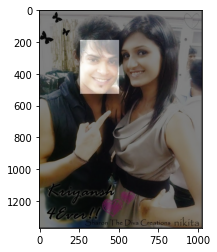

In [22]:
from xml.etree import ElementTree
image_id = 12
image = train_set.load_image(image_id)
print(image.shape)
# load image mask
mask, class_ids = train_set.load_mask(image_id)
print(mask.shape)
# plot image
pyplot.imshow(image)
# plot mask
pyplot.imshow(mask[:, :, 0], cmap='gray', alpha=0.5)
pyplot.show()

In [23]:
class rostroconfig(Config):
	# define the name of the configuration
	NAME = "rostro_cfg"
	# number of classes (background + kangaroo)
	NUM_CLASSES = 2
	# number of training steps per epoch
	STEPS_PER_EPOCH = 480

In [24]:
config = rostroconfig()
config.display()
# define the model
model = MaskRCNN(mode='training', model_dir=img_dir+'/Pesos', config=config)
# load weights (mscoco) and exclude the output layers
model.load_weights(img_dir+'/mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
# train weights (output layers or 'heads')
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=5, layers='heads')


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

D:\Universidad Nacional\Programas\Anaconda\Anaconda\envs\p37env\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
D:\Universidad Nacional\Programas\Anaconda\Anaconda\envs\p37env\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
D:\Universidad Nacional\Programas\Anaconda\Anaconda\envs\p37env\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
480/480 [==============================] - 16519s 34s/step - loss: 1.6588 - rpn_class_loss: 0.0498 - rpn_bbox_loss: 0.4528 - mrcnn_class_loss: 0.1533 - mrcnn_bbox_loss: 0.4465 - mrcnn_mask_loss: 0.5563 - val_loss: 1.4660 - val_rpn_class_loss: 0.0412 - val_rpn_bbox_loss: 0.3710 - val_mrcnn_class_loss: 0.1483 - val_mrcnn_bbox_loss: 0.3687 - val_mrcnn_mask_loss: 0.5369
Epoch 2/5
480/480 [==============================] - 16621s 35s/step - loss: 1.2511 - rpn_class_loss: 0.0305 - rpn_bbox_loss: 0.2957 - mrcnn_class_loss: 0.1354 - mrcnn_bbox_loss: 0.2896 - mrcnn_mask_loss: 0.4999 - val_loss: 1.3950 - val_rpn_class_loss: 0.0901 - val_rpn_bbox_loss: 0.3862 - val_mrcnn_class_loss: 0.1157 - val_mrcnn_bbox_loss: 0.3149 - val_mrcnn_mask_loss: 0.4881
Epoch 3/5
480/480 [==============================] - 17489s 36s/step - loss: 1.1126 - rpn_class_loss: 0.0269 - rpn_bbox_loss: 0.2496 - mrcnn_class_loss: 0.1188 - mrcnn_bbox_loss: 0.2379 - mrcnn_mask_loss: 0.4793 - val_loss: 1.3964 - val_rpn_c

In [ ]:
model.

In [ ]:
val_img=rd.sample(listdir(images_dir),len(listdir(images_dir))*p_val//100)

In [ ]:
!pip install h5py==2.10.0

In [ ]:
!pip install tensorflow==1.14.0

In [ ]:
!pip install keras==2.2.4
from keras.engine import saving